![Astrofisica Computacional](../../logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

---

# Ejercicio 03. Ecuaciones Diferenciales Ordinarias I

## B. Orbita Terrestre


Las ecuaciones para el movimeinto de la Tiera alrededor del Sol son

\begin{equation}
    \frac{d^2 \textbf{r}}{dt^2} = - GM \frac{\textbf{r}}{r^3}
\end{equation}

donde $G$ es la constante gravitacional de Newton y $M$ es la masa del Sol. Como es bien conocido, la órbita terrestre no es perfectamente circular. En el punto de máximo acercamiento al Sol (perihelio), la distancia entre los dos cuerpos es de $1.4710 \times 10^{11} \text{ m}$ y su velocidad lineal es de $3.0287 \times 10^4 \text{ m/s}$.

1. Escriba un programa que calcule la orbita terrestre utilizando un método simpléctico con un paso temporal de $1 \text {hora}$. Grafique la trayectoria completando varias vueltas alrededor del Sol.

2. Incluya en el programa una función que calcule la energía potencial, la energía cinética y la energía total del sistema en cada paso y grafique sus resultados en los mismos ejes. Los resultados deben mostrar que las energías cinética y potencial cambian visiblemente a lo largo de la trayectoria mientras que la energía total debe permanecer constante.
    
3. Ahora grafique únicamente la energía total para comprobar que existe una pequeña variación en cada una de las orbitas. Sin embargo, el método Verlet debe retornar al valor inicial después de cada vuelta.

---
**Solución**

La masa de la Tierra, $m$, es  mucho más pequeña que la masa del Sol, i.e. $m \ll M$. Este hecho hace que el Sol permanezca estático mientras el cometa se mueve en orbita alrededor suyo bajo la influencia gravitacional.

Las ecuaciones dinámicas del cometa se pueden escribir como el siguiente sistema de 4 ecuaciones de primer orden restringidas al plano del movimiento,

\begin{align}
\frac{d x}{dt} = &v^x \\
\frac{d y}{dt} = &v^y \\
\frac{dv^x}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} x \\
\frac{dv^y}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} y
\end{align}


Una consideración importante para tener en cuenta involucra los grandes números presentes en el problema, como por ejemplo la masa del Sol y las distancias que se trabajan.  Por esta razón, lo más convenientes es utilizar un sistema de unidades adecuado para describir el Sistema Solar. Así, utilizaremos:

- unidad de masa: masa Solar $[M_{\odot }]$
- unidad distancia: Unidad Astronómica [au]
- unidad de tiempo: años [yr]

Utilizando este sistema de unidades, la constante gravitacional de Newton tendrá un valor de $G = 4\pi^2$,

De esta forma, implementaremos ua función llamada `f` que retornará el lado derecho de las ecuaciones diferenciales de movimiento y una función denominada `conserv_quant` que calculas las cantidades conservadas del problema (energía y momento angular).

In [16]:
import numpy as np

# Newtonian Gravitational Constant
G = 4.*np.pi**2
M = 1.

def f(t0, q0):
    '''
    ------------------------------------------
    f(t0, q0) 
    ------------------------------------------
    ODEs system for the motion of a test 
    particle around the Sun using cartesian 
    coordinates in the orbital plane.
    ------------------------------------------
    Arguments:
    t0: initial time
    q0: numpy array with the initial condition
        data:
        q0[0] = x
        q0[1] = y
        q0[2] = dx/dt
        q0[3] = dy/dt
    ------------------------------------------
    Dependeces: NumPy
    ------------------------------------------
    '''
    f = np.zeros(4)
    f[0] = q0[2]
    f[1] = q0[3]
    f[2] = - G*M*q0[0]/(q0[0]**2 + q0[1]**2)**(3/2)
    f[3] = - G*M*q0[1]/(q0[0]**2 + q0[1]**2)**(3/2)
    return f

def conserv_quant(q):
    '''
    ------------------------------------------
    conserv_quant(q)
    ------------------------------------------
    Evaluates the total energy and the total 
    angular momentum for the system 
    ------------------------------------------
    Arguments:
    q: NumPy array with the state of the 
       system in the format
       q = [t, x, y, vx, vy]
    ------------------------------------------
    Returns:
    E : Total Energy
    L : Total Angular Momentum
    ------------------------------------------
    Dependeces: NumPy
    ------------------------------------------
    '''
    CQ = np.zeros([len(q),3])
    CQ[:,0] = q[:,0] 
    v2 = q[:,3]**2 + q[:,4]**2
    r = np.sqrt(q[:,1]**2 + q[:,2]**2)
    E = v2/2 - G*M/r
    L = q[:,1]*q[:,4] - q[:,2]*q[:,3]
    CQ[:,1] = E
    CQ[:,2] = L
    return CQ


**Condición Inicial**

Tomaremos $t=0$ en el perihelio. Allí la distancia entre los dos cuerpos es de $1.4710 \times 10^{11} \text{ m}$ y su velocidad lineal es de $3.0287 \times 10^4 \text{ m/s}$. De esta forma se tomará la siguiente condición incial:

\begin{equation}
        \begin{cases}
            x = &1.4710 \times 10^{11} \text{ m}\\
            y = &0 \text{ m}\\
            v^x = &0  \text{ m/s}\\
            v^y = &3.0287 \times 10^4 \text{ m/s}.
        \end{cases}
    \end{equation}
    
Transformamos esta información a las unidades establecidas arriba,

In [17]:
# Initial Conditions
x = 1.4710e11 # [m]
y = 0 # [m]
vx = 0 # [m/s]
vy = 3.0287e4 # [m/s]

# Conversion Factors
au2m = 1.496e11  # 1au in meters
yr2s = 3.154e7   # 1yr in seconds

# Transformation
x *= 1/au2m # [au]
y *= 1/au2m # [au]
vx *= yr2s/au2m # [au/yr]
vy *= yr2s/au2m # [au/yr]


x, vy

(0.9832887700534759, 6.385374197860962)

## Solución del sistema ODEs

Definiremos una malla temporal con intervalos constantes iniciando en $t_0 = 0$ hasta $t_f = 5$ años y utilizaremos el algoritmo velocidad-Verlet para resolver el sistema de ecuaciones diferenciales. Según establece el enunciado del ejercicio, se utilizará un tamaño de paso de $\Delta t = 1 \text{ h} = 0.000114155 \text{ yr} \approx 0.0001 \text{ yr}$.

In [37]:
# Computation time
import time

# Velocity-Verlet Algorithm
def velVerlet(ODE, t0, q0, tf, dt):
    '''
    ------------------------------------------
    velVerlet(ODE, t0, q0, tf, dt)
    Velocity-Verlet method for solving 
    a system of ODEs.
    ------------------------------------------
    Arguments:
    ODE: function defining the system of ODEs
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    tf: independent parameter final value
    dt: Stepsize for the integration
    ------------------------------------------
    Dependences: NumPy
    ------------------------------------------
    '''
    d = int(len(q0)/2) # Dimension of the system 
    n = int((tf - t0)/dt) # Number of steps
    # Initial condition
    q = np.zeros([n,2*d+1])
    q[0,0] = t0
    q[0,1:] = q0
        
    for i in range(1,n):
        q[i,0] = q[i-1,0] + dt
        v_half = q[i-1,d+1:] + ODE(q[i-1,0], q[i-1,1:])[d:]*dt/2
        q[i,1:d+1] = q[i-1,1:d+1] + v_half*dt
        q[i,d+1:] = v_half + ODE(q[i,0], q[i,1:])[d:]*dt/2
    return q


# Creation of the time grid (in years)
t0 = 0. # [yr]
tf = 5. # [yr]

# Constant stepsize
dt = 1e-4 # [yr] \approx 1 hour

# Initial Conditions
Q0 = np.array([x, y, vx, vy])

# Solving the System
start = time.time()
Q = velVerlet(f, t0, Q0, tf, dt)
conservedQuantities = conserv_quant(Q)
end = time.time()

print('El tiempo de computo fue:', end - start)

El tiempo de computo fue: 0.4046821594238281


Visualizamos la coordenada x para contar un número total de 6 orbitas alrededor del Sol,

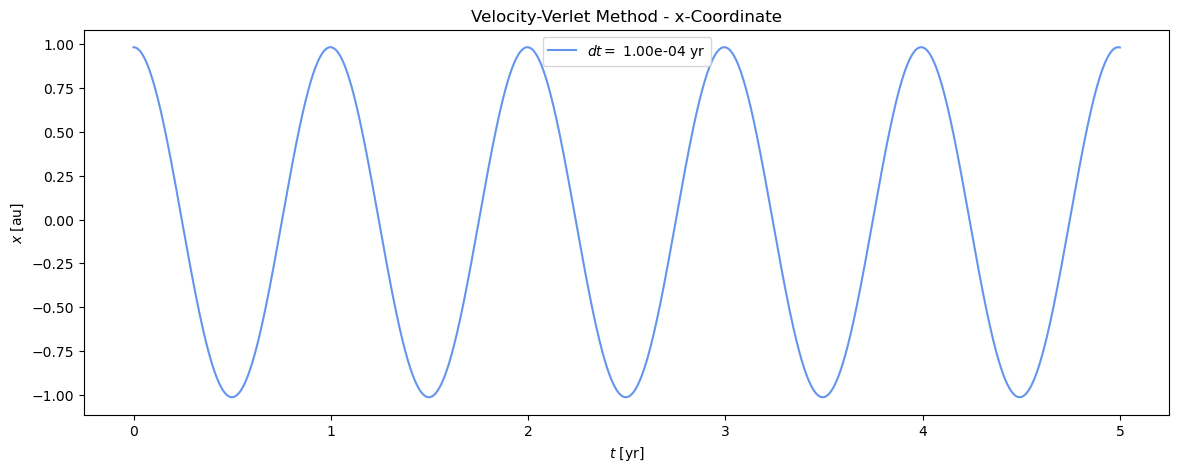

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14,5))
ax.plot(Q[:,0], Q[:,1], color='cornflowerblue', label=f'$dt=$ {dt:.2e} yr')
ax.set_title('Velocity-Verlet Method - x-Coordinate')
ax.set_xlabel(r'$t$ [yr]')
ax.set_ylabel(r'$x$ [au]')
ax.legend()

plt.show()

In [6]:
Q.shape

(50000, 5)

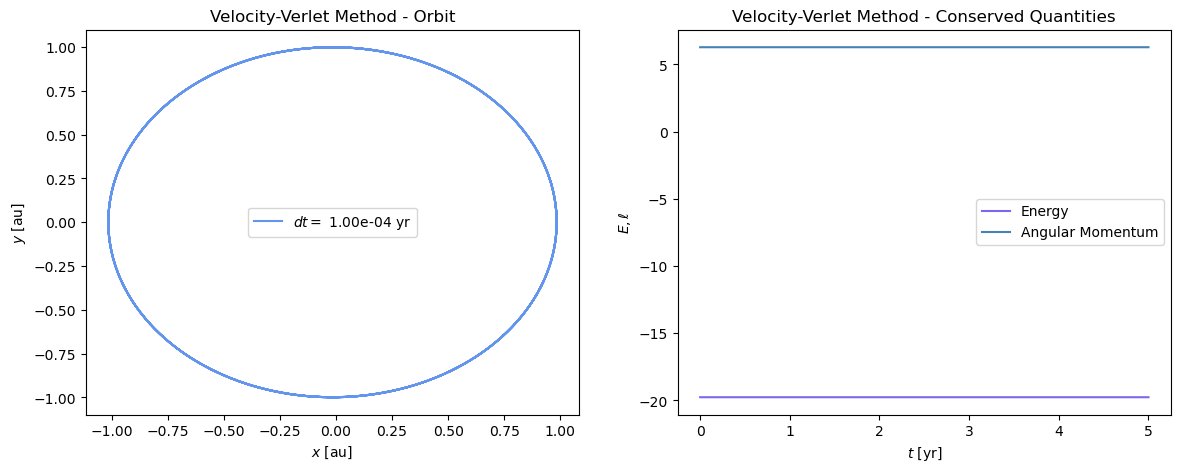

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(Q[:,1], Q[:,2], color='cornflowerblue', label=f'$dt=$ {dt:.2e} yr')
ax[0].set_title('Velocity-Verlet Method - Orbit')
ax[0].set_xlabel(r'$x$ [au]')
ax[0].set_ylabel(r'$y$ [au]')
ax[0].legend()

ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,1], color='mediumslateblue', label=f'Energy')
ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,2], color='steelblue', label=f'Angular Momentum')
ax[1].set_title('Velocity-Verlet Method - Conserved Quantities')
ax[1].set_xlabel(r'$t$ [yr]')
ax[1].set_ylabel(r'$E, \ell$')
ax[1].legend()

plt.show()

Para este tamaño del paso de integración se presenta una leve perdida de energía: 

In [8]:
print('El cambio en energía es :', np.abs(conservedQuantities[-1,1] - conservedQuantities[0,1]))
print('\nEl cambio en momento angular es :', np.abs(conservedQuantities[-1,2] - conservedQuantities[0,2]))

El cambio en energía es : 1.0960476970467425e-10

El cambio en momento angular es : 1.7763568394002505e-13


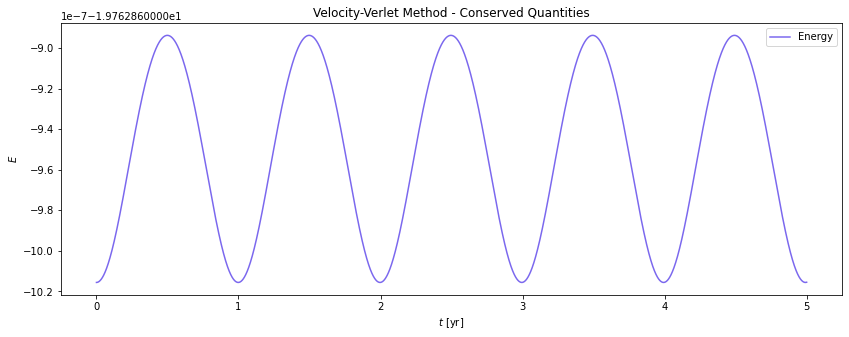

In [9]:
fig, ax = plt.subplots(figsize=(14,5))


ax.plot(conservedQuantities[:,0], conservedQuantities[:,1], color='mediumslateblue', label=f'Energy')
ax.set_title('Velocity-Verlet Method - Conserved Quantities')
ax.set_xlabel(r'$t$ [yr]')
ax.set_ylabel(r'$E$')
ax.legend()
plt.show()

In [10]:
print(f'Energía inicial: {conservedQuantities[0,1]:.7f}')

Energía inicial: -19.7628610


In [11]:
print(f'Energía promedio en los 5 años: {conservedQuantities[:,1].mean():.7f}')

Energía promedio en los 5 años: -19.7628610


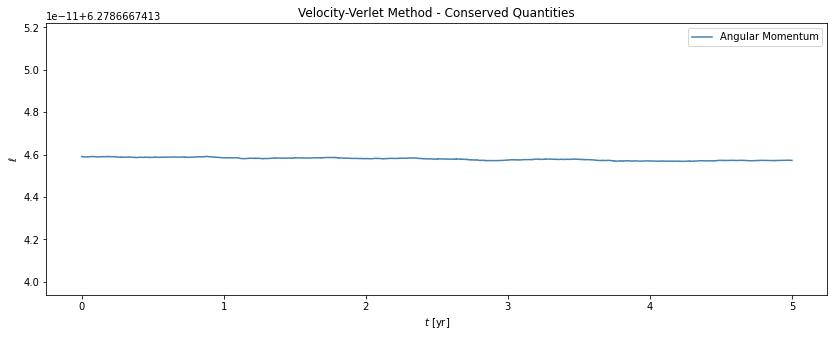

In [12]:
fig, ax = plt.subplots(figsize=(14,5))


ax.plot(conservedQuantities[:,0], conservedQuantities[:,2], color='steelblue', label=f'Angular Momentum')
ax.set_title('Velocity-Verlet Method - Conserved Quantities')
ax.set_xlabel(r'$t$ [yr]')
ax.set_ylabel(r'$\ell$')
ax.legend()
plt.show()

In [13]:
# Verlet Algorithm
def Verlet(ODE, t0, q0, tf, dt):
    '''
    ------------------------------------------
    Verlet(h, t0, q0)
    Verlet method for solving a system of ODEs
    ------------------------------------------
    Arguments:
    ODE: function defining the system of ODEs
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    tf: independent parameter final value
    n: Stepsize for the integration
    ------------------------------------------
    Dependences: NumPy
    ------------------------------------------
    '''
    d = int(len(q0)/2) # Dimension of the system 
    n = int((tf - t0)/dt) # Number of steps
    # Initial condition
    q = np.zeros([n,2*d+1])
    q[0,0] = t0
    q[0,1:] = q0
    # Inicialization with Euler half-step backwards
    q_half = q[0,1:d+1] - q[0,d+1:]*dt+ 0.5*ODE(q[0,0], q[0,1:])[d:]*dt**2
    q[1,0] = q[0,0] + dt
    q[1,1:d+1] = 2*q[0,1:d+1] - q_half + ODE(q[0,0], q[0,1:])[d:]*dt**2
    q[1,d+1:] =(q[0,1:d+1] - q_half)/(2*dt)
        
    for i in range(1,n):
        q[i,0] = q[i-1,0] + dt
        q[i,1:d+1] = 2*q[i-1,1:d+1] - q[i-2,1:d+1] + ODE(q[i-1,0], q[i-1,1:])[d:]*dt**2
        q[i,d+1:] =(q[i,1:d+1]-q[i-2,1:d+1])/(2*dt)
    return q

